# Interactive collaborative web server

## Starting point: a simplistic Jupyter workflow. 
### - *Generate a random dataset, and then plot it.*
### - *Optionally, cluster it first.*

### **1. Generate dataset**

In [1]:
from sklearn.datasets import make_blobs

dataset, dataset_classes = make_blobs(n_samples=250, centers=6)
dataset

array([[ -2.35127   ,  -1.16717908],
       [  3.85691982,   2.69615047],
       [ -2.14770319,   1.54185122],
       [ -2.42406088,  -7.91266977],
       [ -6.19825806,  -4.83098092],
       [  2.72002116,   2.09962494],
       [ -2.11572669,  -7.30607788],
       [ -1.84170217,  -9.51817432],
       [  4.32305538,   1.71159257],
       [ -2.88753829,  -0.36281051],
       [ -5.45167981,  -4.96451286],
       [  3.72208577,   1.0951292 ],
       [  4.55315406,   0.10081535],
       [  4.28924726,   3.06201444],
       [  4.38034016,   1.56801767],
       [  4.59954009,   2.48719487],
       [ -3.20867286,  10.25682243],
       [ -2.2472624 ,  -8.88750099],
       [  3.41165184,   0.5931986 ],
       [ -1.30091757,  -8.47734061],
       [ -3.22859105,   7.67486248],
       [ 10.15748148,  -7.77482394],
       [ -3.41177983,  -5.40490971],
       [  4.80492933,   4.10870563],
       [ -1.5109031 ,   1.70595493],
       [ -5.63657527,   8.22148365],
       [  9.28916018, -10.33058019],
 

### **2. Plot without clustering**

In [2]:
import matplotlib.pyplot as plt

def plot_dataset(dataset, colors):
    x, y = dataset[:, 0], dataset[:, 1]
    plt.scatter(x,y, c=colors)

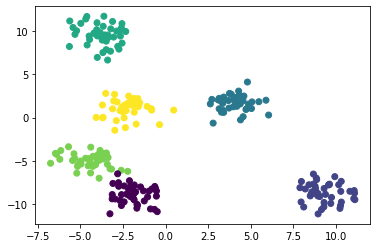

In [3]:
plot_dataset(dataset, dataset_classes)

### **3. Plot with clustering**

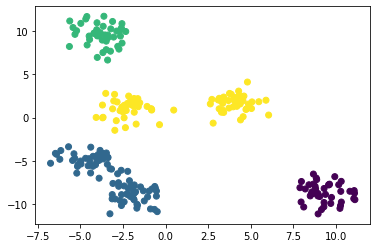

In [4]:
from sklearn.cluster import KMeans
k = 4
clustering = KMeans(n_clusters=k).fit_predict(dataset)
plot_dataset(dataset, clustering)

## Before we start: clean up the workflow
### - *Make it deterministic (explicit random state)*
### - *Put all computation in functions.*
### - *Self-contained functions: don't rely on global variables or external imports.*
### - *Self-contained functions: return the plot as image bytes.*

### **1. Generate dataset**

In [5]:
def generate_dataset(n_samples, random_state, delay, n_clusters):
    # create artifical delay, so that the workflow status can be monitored
    import time
    time.sleep(delay)
    
    from sklearn.datasets import make_blobs
    dataset, dataset_classes = make_blobs(n_samples=n_samples, random_state=random_state, centers=n_clusters)
    return dataset, dataset_classes

In [6]:
n_samples = 250
random_state = 0
delay = 2
n_clusters = 6
dataset, dataset_classes = generate_dataset(n_samples, random_state, delay, n_clusters)
dataset

array([[-3.90742801e+00,  8.44177954e+00],
       [ 9.25757310e+00, -2.17024146e+00],
       [ 2.15504965e+00,  4.12386249e+00],
       [-9.73739417e-01,  6.94454493e+00],
       [-7.55113462e-01,  3.74138642e+00],
       [ 3.03809631e-01,  3.94423417e+00],
       [ 1.07932501e+01, -6.11580316e-01],
       [ 2.18217961e+00,  1.29965302e+00],
       [-2.16434104e+00,  2.52061045e+00],
       [-1.36641982e+00,  7.15528181e+00],
       [ 2.45127423e+00, -1.95397849e-01],
       [ 1.00877750e+01, -2.27224403e+00],
       [ 2.20656076e+00,  5.50616718e+00],
       [ 2.46452227e+00,  6.19967650e+00],
       [ 9.14314826e+00, -2.23721639e+00],
       [ 9.08260172e+00, -2.72601914e+00],
       [ 1.44193252e+00,  2.76754364e+00],
       [ 4.92573752e+00,  1.53580774e-01],
       [ 7.07656534e-01,  8.22555334e+00],
       [ 2.63185834e+00,  6.89364904e-01],
       [ 2.50904929e+00,  5.77314610e+00],
       [-7.22828865e-02,  2.88376939e+00],
       [ 8.08035174e-02,  4.69068983e+00],
       [ 1.

### **2. Plot without clustering**

In [7]:
def plot_dataset(dataset, colors):
    import matplotlib.pyplot as plt    
    x, y = dataset[:, 0], dataset[:, 1]
    plt.scatter(x,y, c=colors)    
    
    # We need to return the image bytes. Unfortunately, there is no Matplotlib built-in function for this
    from io import BytesIO
    image = BytesIO()
    plt.savefig(image)
    return image.getvalue()

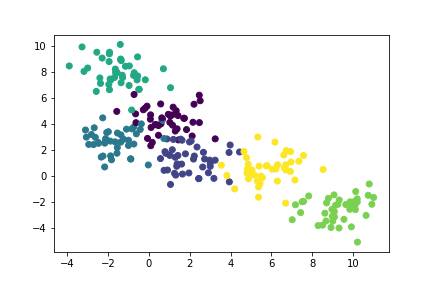

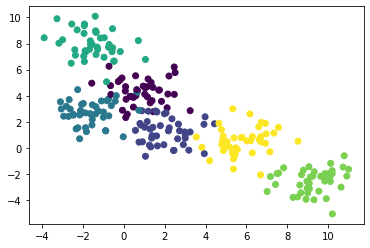

In [8]:
plot = plot_dataset(dataset, dataset_classes)
from IPython.display import Image
Image(plot)

### **3. Plot with clustering**

In [9]:
def get_clustering(dataset, k):
    from sklearn.cluster import KMeans
    clustering = KMeans(n_clusters=k).fit_predict(dataset)
    return clustering

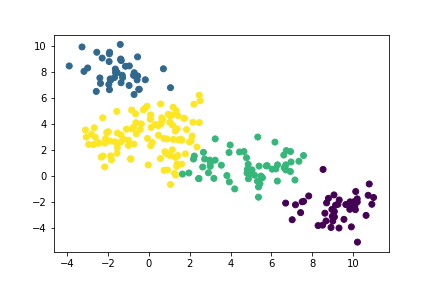

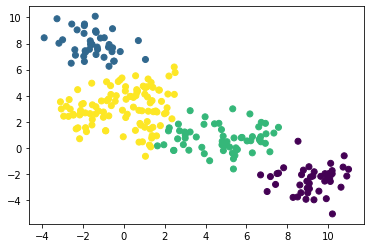

In [10]:
k = 4
clustering = get_clustering(dataset, k)
plot = plot_dataset(dataset, clustering)
Image(plot)

# Porting the workflow to Seamless

### Create a new Seamless project
(If Seamless is installed locally, you would use the `seamless-new-project` command instead)

In [11]:
import os
if not os.path.exists("web/"):
    os.system("python3 ~/seamless-scripts/new-project.py webserver-example")
else:
    # To avoid merge conflicts, remove all existing customized web content
    os.system("rm -f web/webform.json web/index.html web/index.js web/*CONFLICT.*")

# new-project.py will generate a default Notebook for the project. Link it to the current notebook instead
os.system("rm -f webserver-example.ipynb")
os.system("ln -s webserver.ipynb webserver-example.ipynb")

0

### Load the project

In [12]:
%run -i load-project.py
await load()

*** define_graph() function is empty. Loading 'graph/webserver-example.seamless' ***

/opt/conda/lib/python3.8/site-packages/seamless/core/mount.py:123: RuntimeWarning: coroutine 'sleep' was never awaited
  pass
Project loaded.

    Main context is "ctx"
    Web/status context is "webctx"

    Open http://localhost:<REST server port> to see the web page
    Open http://localhost:<REST server port>/status/status.html to see the status

    Run save() to save the project
    


Opened the seamless share update server at port 5138
Opened the seamless REST server at port 5813


### **1. Generate dataset**

In [13]:
ctx.generate_dataset = generate_dataset  # Python function "generate_dataset" => Seamless transformer ctx.generate_dataset
ctx.generate_dataset.delay = 0
ctx.generate_dataset.n_clusters = 6
ctx.generate_dataset.n_samples = 250
ctx.generate_dataset.random_state = 0

ctx.generated_dataset = ctx.generate_dataset.result
ctx.dataset = ctx.generated_dataset[0]
ctx.dataset.celltype = "binary"    # "binary" means "Numpy array"
ctx.dataset_classes = ctx.generated_dataset[1]
ctx.dataset_classes.celltype = "binary"

await ctx.computation()
print(ctx.generate_dataset.status, "Exception: ", ctx.generate_dataset.exception)
print("Result:")
ctx.dataset.value


Status: OK Exception:  None
Result:


array([[-3.90742801e+00,  8.44177954e+00],
       [ 9.25757310e+00, -2.17024146e+00],
       [ 2.15504965e+00,  4.12386249e+00],
       [-9.73739417e-01,  6.94454493e+00],
       [-7.55113462e-01,  3.74138642e+00],
       [ 3.03809631e-01,  3.94423417e+00],
       [ 1.07932501e+01, -6.11580316e-01],
       [ 2.18217961e+00,  1.29965302e+00],
       [-2.16434104e+00,  2.52061045e+00],
       [-1.36641982e+00,  7.15528181e+00],
       [ 2.45127423e+00, -1.95397849e-01],
       [ 1.00877750e+01, -2.27224403e+00],
       [ 2.20656076e+00,  5.50616718e+00],
       [ 2.46452227e+00,  6.19967650e+00],
       [ 9.14314826e+00, -2.23721639e+00],
       [ 9.08260172e+00, -2.72601914e+00],
       [ 1.44193252e+00,  2.76754364e+00],
       [ 4.92573752e+00,  1.53580774e-01],
       [ 7.07656534e-01,  8.22555334e+00],
       [ 2.63185834e+00,  6.89364904e-01],
       [ 2.50904929e+00,  5.77314610e+00],
       [-7.22828865e-02,  2.88376939e+00],
       [ 8.08035174e-02,  4.69068983e+00],
       [ 1.

### **2. Plot without clustering**

In [14]:
ctx.plot_dataset = plot_dataset   # Python function "plot_dataset" => Seamless transformer ctx.plot_dataset
ctx.plot_dataset.dataset = ctx.dataset
ctx.plot_dataset.colors = ctx.dataset_classes
ctx.plot = ctx.plot_dataset.result
ctx.plot.celltype = "bytes"
ctx.plot.mimetype = "png"
await ctx.computation()
print(ctx.plot.status, "Exception:", ctx.plot_dataset.exception)

Status: OK Exception: None


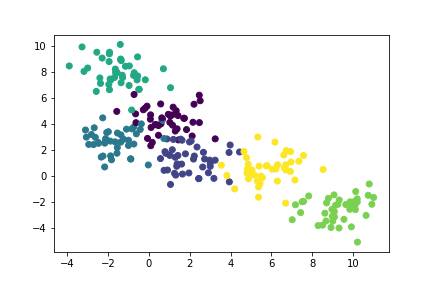

In [15]:
Image(ctx.plot.value)

### Add some cells that control the workflow parameters


In [16]:
ctx.delay = Cell("float").set(0)
ctx.random_state = Cell("int").set(0)
ctx.generate_dataset.delay = ctx.delay
ctx.generate_dataset.random_state = ctx.random_state

await ctx.computation()

### Generate a little Jupyter dashboard to control the workflow

#### Changing the random state will change the graph

#### Increasing the "delay" slider will slow down execution

#### Once execution has finished, the plot will be updated

In [17]:
from ipywidgets import IntSlider, FloatSlider

widget_random_state = IntSlider(min=0,max=100, description="Rand state")
widget_delay = FloatSlider(min=0,max=10, description="Delay")
ctx.random_state.traitlet().link(widget_random_state)
ctx.delay.traitlet().link(widget_delay)

display(widget_random_state)
display(widget_delay)
print("Plot")
display(ctx.plot.output())

IntSlider(value=0, description='Rand state')

FloatSlider(value=0.0, description='Delay', max=10.0)

Plot


Output(outputs=({'output_type': 'display_data', 'data': {'image/png': 'iVBORw0KGgoAAAANSUhEUgAAAbAAAAEgCAYAAAD…

#### The cells can still be changed programmatically. 
#### This will update the slider above, and re-build the plot

In [18]:
ctx.random_state = 6

### **3. Plot with clustering**

In [19]:
ctx.k = Cell("int").set(3)
ctx.get_clustering = get_clustering  # Python function "get_clustering" => Seamless transformer ctx.get_clustering
ctx.get_clustering.dataset = ctx.dataset
ctx.get_clustering.k = ctx.k
ctx.clustering = ctx.get_clustering.result
ctx.clustering.celltype = "binary"
ctx.plot_dataset.colors = ctx.clustering
await ctx.computation()

### Generate a new Jupyter dashboard to control the updated workflow

In [20]:
widget_random_state = IntSlider(min=0,max=100, description="Rand state")
widget_delay = FloatSlider(min=0,max=10, description="Delay")
widget_k = IntSlider(min=1,max=20, description="K Clusters")
ctx.random_state.traitlet().link(widget_random_state)
ctx.delay.traitlet().link(widget_delay)
ctx.k.traitlet().link(widget_k)

display(widget_random_state)
display(widget_delay)
display(widget_k)
print("Plot")
display(ctx.plot.output())

IntSlider(value=6, description='Rand state')

FloatSlider(value=0.0, description='Delay', max=10.0)

IntSlider(value=3, description='K Clusters', max=20, min=1)

Plot


Output(outputs=({'output_type': 'display_data', 'data': {'image/png': 'iVBORw0KGgoAAAANSUhEUgAAAbAAAAEgCAYAAAD…

# Building a web server
### Now we will share the plot directly over the web

In [21]:
ctx.plot.share()
await ctx.translation()

### The following link will display the plot (new tab)
### http://localhost:5813/ctx/plot

### We can do the same for the input parameters. 
#### In fact, the URL is the same, ending with **/ctx/random_state** and **/ctx/delay** instead of **/ctx/plot**

In [22]:
ctx.random_state.share(readonly=False)  # readonly=False, so we can modify it via the web page
ctx.delay.share(readonly=False)
ctx.k.share(readonly=False)
await ctx.computation()

### The following link will display the input parameters (new tab)
### http://localhost:5813/ctx/random_state
### http://localhost:5813/ctx/delay
### http://localhost:5813/ctx/k

## Auto-generated web interface
### Seamless projects embed a generator for a web interface. Shared cells are added automatically.
### It also maintains a status web page that visualizes the workflow graph, and its execution status
### The following link will display the web form (new tab)
### http://localhost:5813/
### The following link will display the status page (new tab)
### http://localhost:5813/status/status.html


#### The cell values are in sync with the Jupyter dashboard above. 

#### The web interface is also collaborative. When multiple users connect, their updates are synchronized as well.

## Customizing the web interface
### Edit the files in the /web directory to customize the web interface.
### The web page can be customized at different levels. The web page is updated immediately upon browser refresh.
- **Customizing webform.json**

  For example, you can copy `webform-CUSTOM.json` to `web/webform.json`. This will show the output plot in the webform.

- **Modifying the generated index.html and index.js by hand**

- **Modifying the webform.json components in /web/components**

### Modifications can lead to merge conflicts, that must be resolved in the -CONFLICT files

In [23]:
#!cp webform-CUSTOM.json web/webform.json